In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the trained model
model.save('fraud_detection_model_with_smote.h5')

# Save the scaler for future use
import pickle
with open('scaler_with_smote.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Epoch 1/10
14216/14216 [==============================] - 58s 4ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0113 - val_accuracy: 0.9980
Epoch 2/10
14216/14216 [==============================] - 55s 4ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0123 - val_accuracy: 0.9988
Epoch 3/10
14216/14216 [==============================] - 55s 4ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0120 - val_accuracy: 0.9990
Epoch 4/10
14216/14216 [==============================] - 60s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0134 - val_accuracy: 0.9991
Epoch 5/10
14216/14216 [==============================] - 58s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0144 - val_accuracy: 0.9990
Epoch 6/10
14216/14216 [==============================] - 56s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0109 - val_accuracy: 0.9987
Epoch 7/10
14216/14216 [==============================] - 57s 4ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0

C:\Users\preri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
import tensorflow as tf

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Number of fraudulent cases
num_fraudulent_cases = sum(y)

# Number of genuine cases
num_genuine_cases = len(y) - num_fraudulent_cases

# Ratio of fraudulent cases
fraud_ratio = num_fraudulent_cases / len(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5  # You can adjust this threshold based on your preference
y_pred = (y_pred_prob >= threshold).astype(int)

# Calculate precision score
precision = precision_score(y_test, y_pred)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Number of fraudulent cases:", num_fraudulent_cases)
print("Number of genuine cases:", num_genuine_cases)
print("Ratio of fraudulent cases:", fraud_ratio)
print("Precision score:", precision)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)





Epoch 1/10


14216/14216 [==============================] - 35s 2ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0109 - val_accuracy: 0.9983
Epoch 2/10
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0106 - val_accuracy: 0.9987
Epoch 3/10
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0087 - val_accuracy: 0.9992
Epoch 4/10
14216/14216 [==============================] - 40s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0111 - val_accuracy: 0.9989
Epoch 5/10
14216/14216 [==============================] - 50s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0113 - val_accuracy: 0.9992
Epoch 6/10
14216/14216 [==============================] - 46s 3ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0166 - val_accuracy: 0.9990
Epoch 7/10
14216/14216 [==============================] - 49s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_lo

1781/1781 [==============================] - 5s 3ms/step


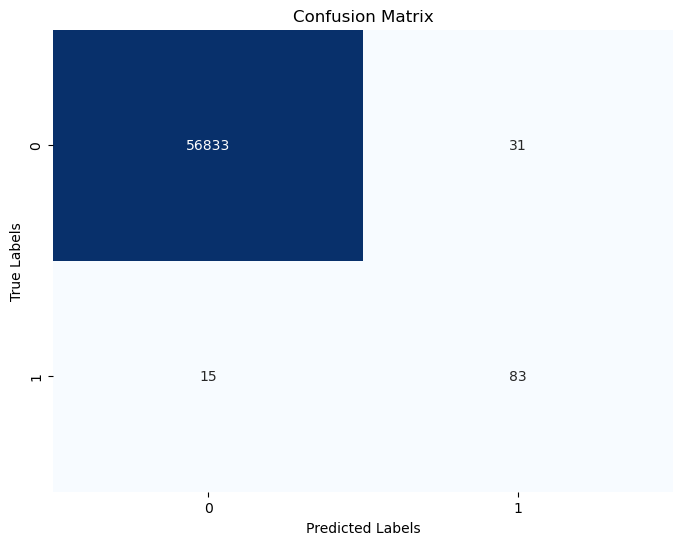

Number of fraudulent cases: 492
Number of genuine cases: 284315
Ratio of fraudulent cases: 0.001727485630620034
Precision score: 0.7280701754385965
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0168 - accuracy: 0.9992
Test Loss: 0.016810797154903412
Test Accuracy: 0.9991924166679382


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5  # You can adjust this threshold based on your preference
y_pred = (y_pred_prob >= threshold).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score
num_fraudulent_cases = sum(y)

# Number of genuine cases
num_genuine_cases = len(y) - num_fraudulent_cases

# Ratio of fraudulent cases
fraud_ratio = num_fraudulent_cases / len(y)
precision = precision_score(y_test, y_pred)
print("Number of fraudulent cases:", num_fraudulent_cases)
print("Number of genuine cases:", num_genuine_cases)
print("Ratio of fraudulent cases:", fraud_ratio)
print("Precision score:", precision)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Number of fraudulent cases: 492
Number of genuine cases: 284315
Ratio of fraudulent cases: 0.001727485630620034
Precision score: 0.7280701754385965


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate fraudulent and non-fraudulent cases
fraudulent_cases = data[data['Class'] == 1]
non_fraudulent_cases = data[data['Class'] == 0]

# Sample an equal number of instances from both classes
num_samples = min(len(fraudulent_cases), len(non_fraudulent_cases))
fraudulent_samples = resample(fraudulent_cases, replace=False, n_samples=num_samples, random_state=42)
non_fraudulent_samples = resample(non_fraudulent_cases, replace=False, n_samples=num_samples, random_state=42)

# Combine the samples to create a balanced dataset
balanced_data = pd.concat([fraudulent_samples, non_fraudulent_samples])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert balanced_data to CSV
balanced_data.to_csv('balanced_creditcard.csv', index=False)

# Separate features (X_balanced) and target variable (y_balanced)
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the trained model
model.save('balanced_fraud_detection_model.h5')

# Save the scaler for future use
import pickle
with open('balanced_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Epoch 1/10
25/25 [==============================] - 2s 17ms/step - loss: 0.5206 - accuracy: 0.7865 - val_loss: 0.3493 - val_accuracy: 0.8883
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.9136 - val_loss: 0.2244 - val_accuracy: 0.9137
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9314 - val_loss: 0.1999 - val_accuracy: 0.9239
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9352 - val_loss: 0.1921 - val_accuracy: 0.9137
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1650 - accuracy: 0.9403 - val_loss: 0.1858 - val_accuracy: 0.9137
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.9504 - val_loss: 0.1790 - val_accuracy: 0.9188
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9593 - val_loss: 0.2035 - val_accuracy: 0.9289
Epoch 8/10
25/25 [=

C:\Users\preri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
